In [16]:
!git clone <https://github.com/Manoj-vbm/Machine_learning.git>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/Manoj-vbm/Machine_learning.git>'


##Supervised learning

It's a type of machine learning where an algorithm learns from labeled data to make predictions or decisions without human intervention. The term "supervised" refers to the process of providing the algorithm with a "teacher" that guides the learning process. In supervised learning, you have a clear input-output mapping, which means you have data with input features and corresponding output labels.

# Linear regression
Linear regression is a statistical method that uses a straight line to predict the value of one variable (the dependent variable) based on the value of another variable (the independent variable).

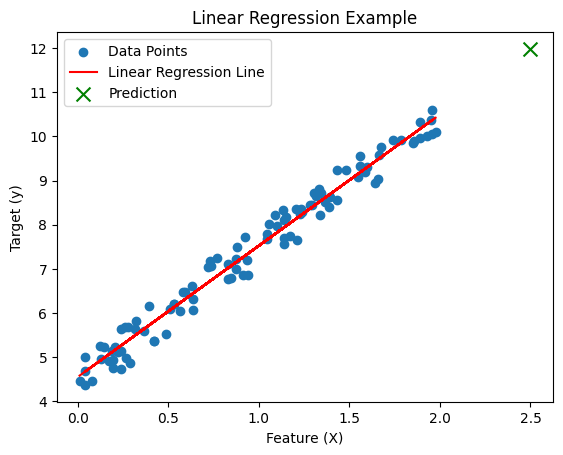

Slope (Coefficient): [[2.96827553]]
Intercept: [4.55808002]


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Feature (input) variable
y = 4 + 3 * X + np.random.rand(100, 1)  # Target (output) variable with some noise

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions for new data
X_new = np.array([[2.5]])  # New input data for prediction
y_pred = model.predict(X_new)

# Plot the data points and the linear regression line
plt.scatter(X, y, label="Data Points")
plt.plot(X, model.predict(X), color='red', label="Linear Regression Line")
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label="Prediction")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.title("Linear Regression Example")
plt.show()

# Print the model parameters (slope and intercept)
print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)



In the above code, a synthetic dataset is first generated with a linear relationship between the feature X and the target variable y. Then, a LinearRegression model is created and fitted to the data. A prediction is then made for a new data point X_new. Finally, the data points, the linear regression line, and the prediction are plotted. The model's slope (coefficient) and intercept are also printed.

Mean Squared Error: 0.5558915986952422


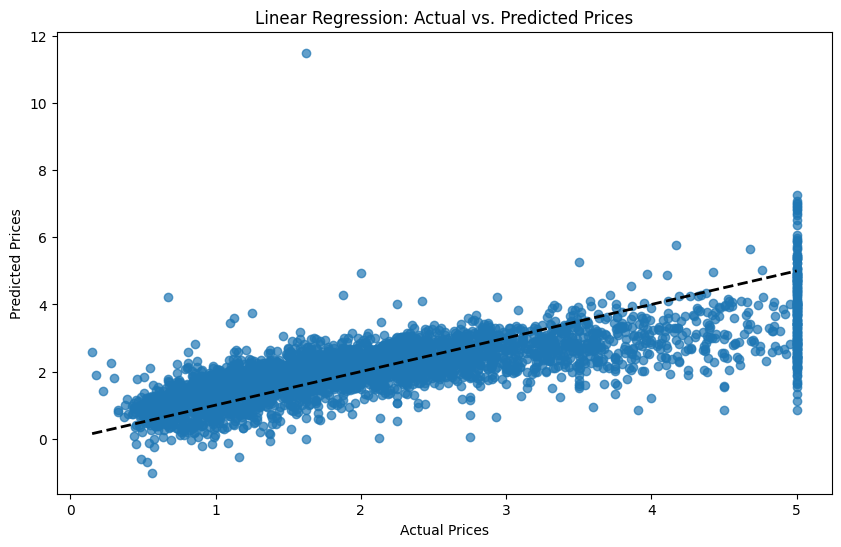

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California Housing Prices dataset
california = fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (housing prices)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the linear regression results
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")

plt.show()


# Logistic Regression
Logistic Regression is a classification algorithm used in machine learning to model the probability that a given input data point belongs to a particular class. Despite its name, logistic regression is used for classification tasks, not regression tasks. It's a fundamental and widely used algorithm for binary and multi-class classification problems.

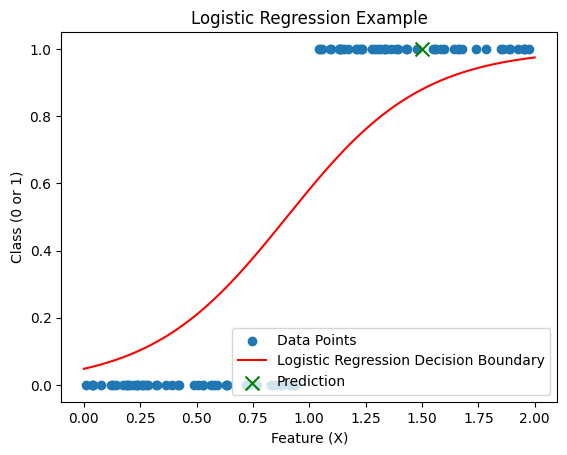

Coefficients: [[3.31887022]]
Intercept: [-2.98977822]


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Feature (input) variable
y = (X > 1).astype(int).ravel()  # Target variable, binary classification

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Fit the model to the data
model.fit(X, y)

# Make predictions for new data
X_new = np.array([[1.5]])  # New input data for prediction
y_pred = model.predict(X_new)

# Plot the data points and the decision boundary
plt.scatter(X, y, label="Data Points")
X_test = np.linspace(0, 2, 1000).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]
plt.plot(X_test, y_prob, color='red', label="Logistic Regression Decision Boundary")
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label="Prediction")
plt.xlabel("Feature (X)")
plt.ylabel("Class (0 or 1)")
plt.legend()
plt.title("Logistic Regression Example")
plt.show()

# Print the model parameters (coefficients and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 0.9064327485380117


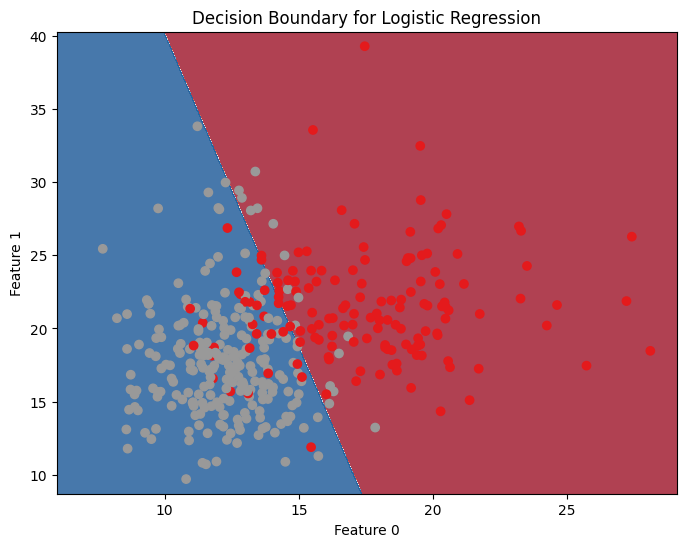

In [9]:
# Use of Logitic regerssion for Breast Cancer dataset
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (class labels)

# Choose two specific features for visualization (e.g., features 0 and 1)
feature1_index = 0
feature2_index = 1

X_subset = X[:, [feature1_index, feature2_index]]

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel(f"Feature {feature1_index}")
plt.ylabel(f"Feature {feature2_index}")
plt.title("Decision Boundary for Logistic Regression")

plt.show()



# Classification
Classification in supervised learning is the process of categorizing input data into predefined classes or categories based on patterns learned from labeled training data.

Accuracy: 1.00


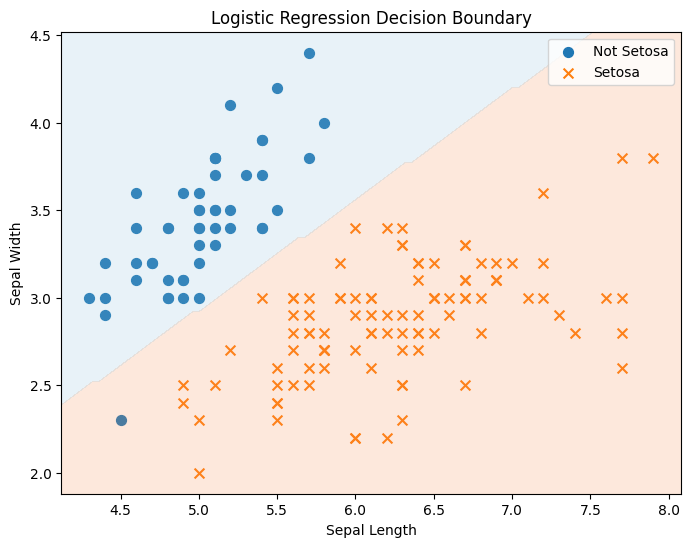

In [15]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Extract features (sepal length and width) and target (Setosa or not Setosa)
X = iris.data[:, :2]  # Use only the first two features (sepal length and width)
y = (iris.target == 0).astype(int)  # 1 for Setosa, 0 for other species

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression classifier
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Not Setosa", marker='o', s=50)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa", marker='x', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.RdYlBu, alpha=0.2)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()